In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df = pd.read_csv(url)

In [3]:
df = df.rename(columns={"Province/State" : "state", "Country/Region": "country"})

In [6]:
df[df["state"] == "Hubei"][df.columns[4:]]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20
62,444,444,549,761,1058,1423,3554,3554,4903,5806,...,68135,68135,68135,68135,68135,68135,68135,68135,68135,68135


In [7]:
df[df["country"] == "US"][df.columns[4:]]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20
225,1,1,2,2,5,5,5,5,5,7,...,1721753,1746019,1770165,1790172,1811020,1831821,1851520,1872660,1897380,1920061


In [10]:
df[df.country == "Singapore"]

,state,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20
196,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,33249,33860,34366,34884,35292,35836,36405,36922,37183,37527


In [6]:
top10 = df.sort_values(by="3/29/20",ascending=False).country[:10]
top10

225                US
137             Italy
201             Spain
62              China
120           Germany
116            France
133              Iran
223    United Kingdom
206       Switzerland
169       Netherlands
Name: country, dtype: object

In [7]:
df = df.fillna("")

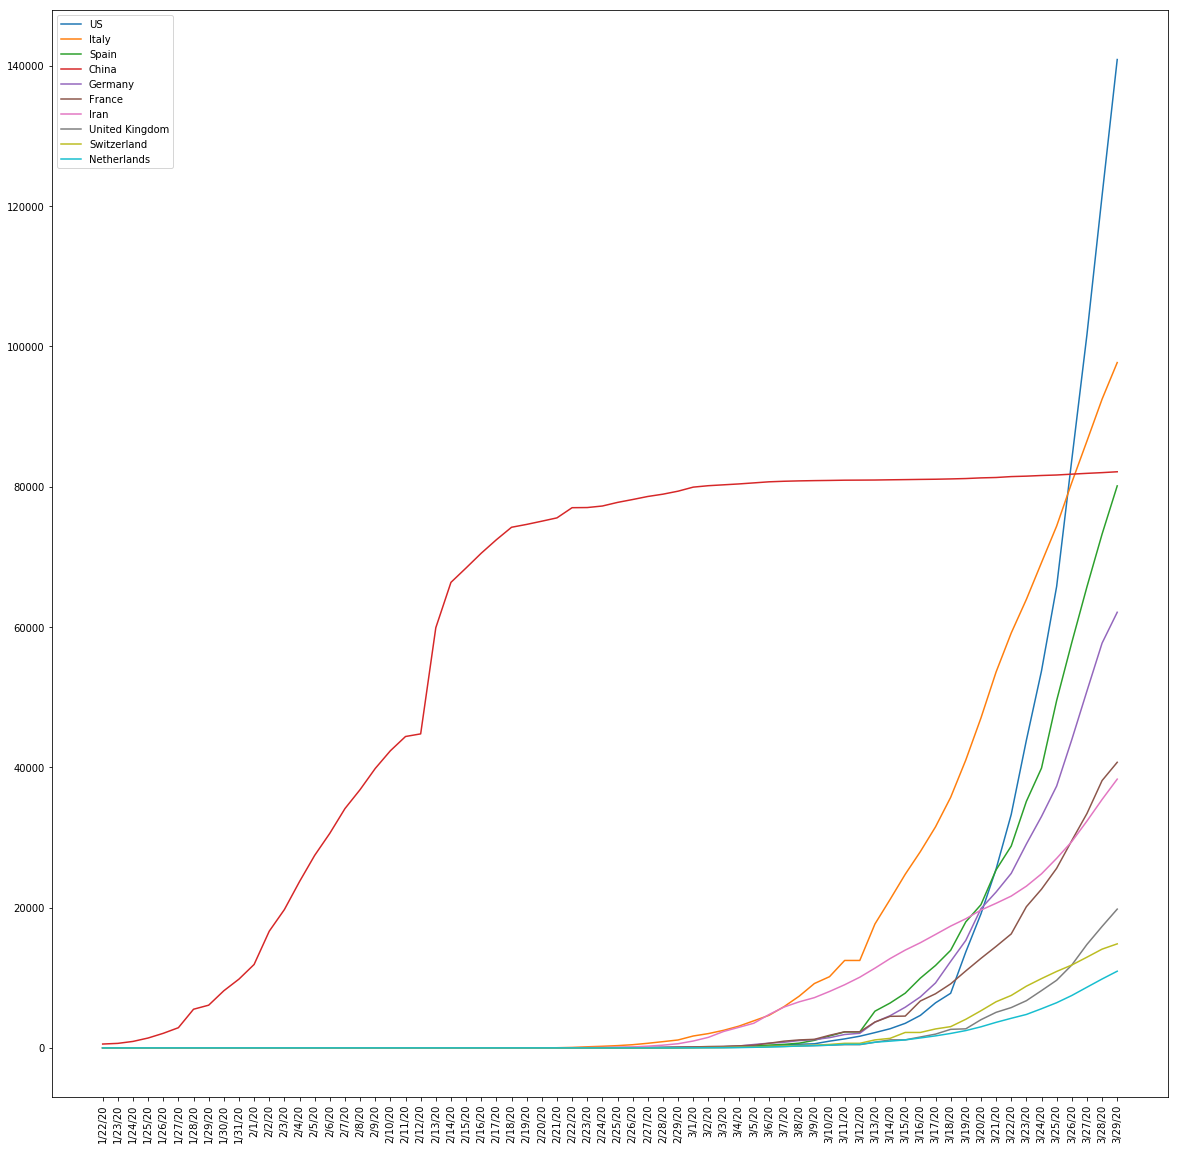

In [10]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
for country in top10:
    df_country = df[df["country"] == country][df.columns[4:]]
    daily_total = df_country.sum(axis=0)
    plt.plot(daily_total,label=country)
plt.legend()
plt.savefig("top10_20200330.png")